___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 16

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Normal em Python](#teoria)
- [Problema: Concentração de poluente em um tanque de combustível](#problema)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
    - [Comparação: resultados empíricos *vs* modelo teórico](#comparacao)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
        - [Exercício 9](#ex9)
        - [Exercício 10](#ex10)
- [Normal Padrão](#z)        
     - [Exercício 11](#ex11)
- [Lista de comandos utilizados neste notebook](#comandos)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

___

<div id="teoria"></div>

## Teoria: Distribuição Normal em Python

![Caixa de galton](LegalTameChanticleer-size_restricted.gif)

[Fonte: https://www.youtube.com/watch?v=UCmPmkHqHXk](https://www.youtube.com/watch?v=UCmPmkHqHXk&t=271s)

A biblioteca SciPy está cheia de funções para nos ajudar a trabalhar com variáveis aleatórias! https://en.wikipedia.org/wiki/SciPy

Algumas funções úteis para desenvolver seu código considerando a distribuição Normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Lembrando que vamos assumir que $X\sim N(\mu, \sigma^2)$.

Logo, faça `from scipy import stats`, então:

* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma) - Formato da função fx`

* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`

* $x$ tal que $p=P(X\leq x)$: `stats.norm.ppf(p, loc=mu, scale=sigma)`

* $E(X)$: `stats.norm.mean(loc=mu, scale=sigma)`

* $Var(X)$: `stats.norm.var(loc=mu, scale=sigma)`

* $DP(X)$: `stats.norm.std(loc=mu, scale=sigma)`

___

<div id="problema"></div>


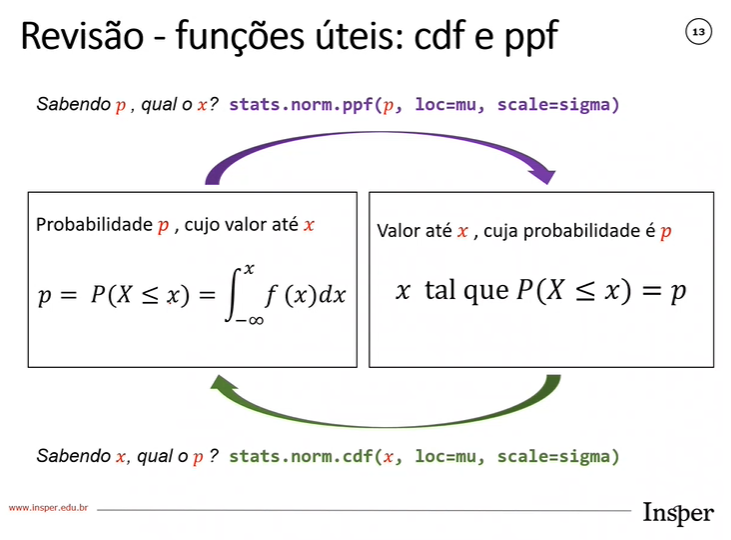

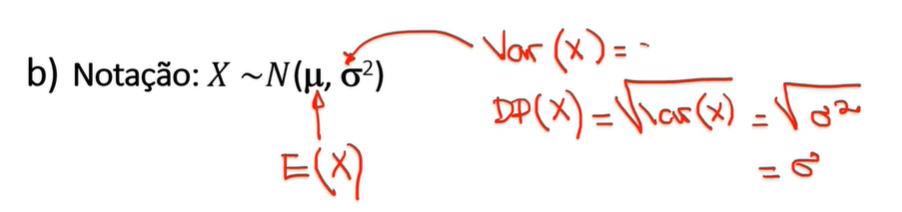

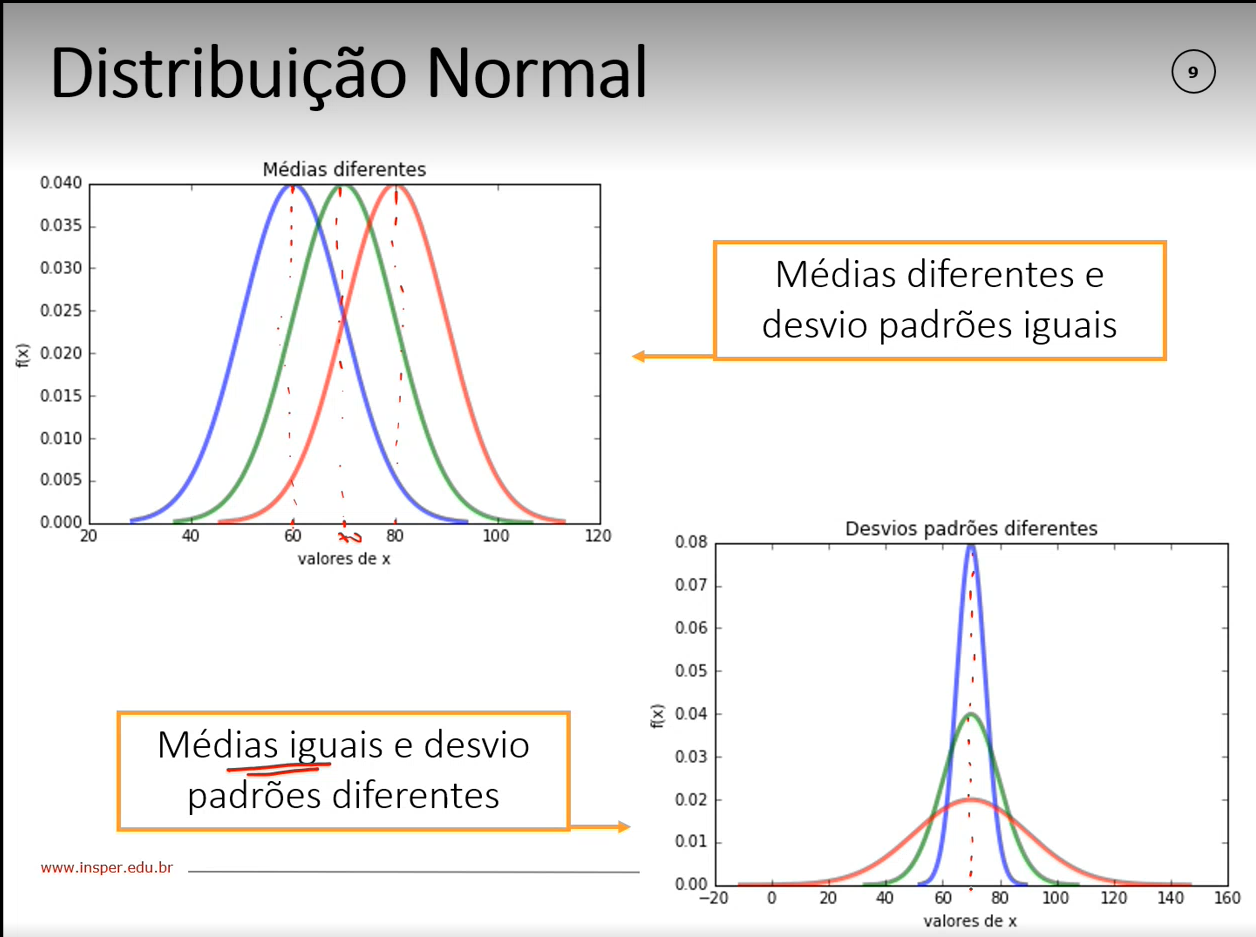

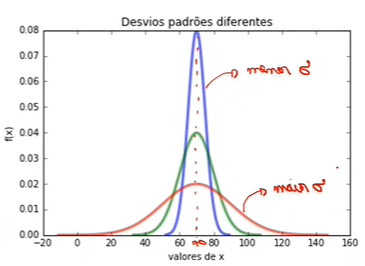


# Problema: Concentração de poluente em um tanque de combustível

A concentração (em $\mu g/L$) de um determinado poluente em um tanque de combustível é modelada como uma normal com média 500 e variância 645.

Nesse caso, vamos assumir que a variável aleatória contínua é dada por:

- $X$: concentração do poluente em um tanque de combustível, em $\mu g/L$.

Pelo modelo teórico, temos: $X\sim N(500, 645).$ Note que $\sigma^2 = 645$, então devemos utilizar $\sigma = \sqrt{645}$ nas funções do `scipy.stats`.

* $f(x)$: `stats.norm.pdf(x, loc=mu, scale=sigma) - Formato da função fx`

* $P(X\leq x)$: `stats.norm.cdf(x, loc=mu, scale=sigma)`

* $x$ tal que $p=P(X\leq x)$: `stats.norm.ppf(p, loc=mu, scale=sigma)`

* $E(X)$: `stats.norm.mean(loc=mu, scale=sigma)`

* $Var(X)$: `stats.norm.var(loc=mu, scale=sigma)`

* $DP(X)$: `stats.norm.std(loc=mu, scale=sigma)`

<div id="modelo-teorico"></div>

## Modelo teórico

<div id="ex1"></div>

### EXERCÍCIO 1

Plote a função de densidade de probabilidade **e** a função cumulativa considerando o modelo utilizado. 

**Dica 1**: fizemos isso com a distribuição exponencial na Aula 15.

**Dica 2**: utilize o intervalo entre 350 e 650 para os valores de $x$.

In [2]:
mu = 500
sigma = sqrt(645) 

In [3]:
# ESCREVA SEU CÓDIGO AQUI

x = np.linspace(350, 650, 1000)
# np.linspace(valor inicial, valor final, Número de amostras a serem geradas)
fx = stats.norm.pdf(x, loc = mu, scale = sigma)
cdf = stats.norm.cdf(x, loc = mu, scale = sigma)

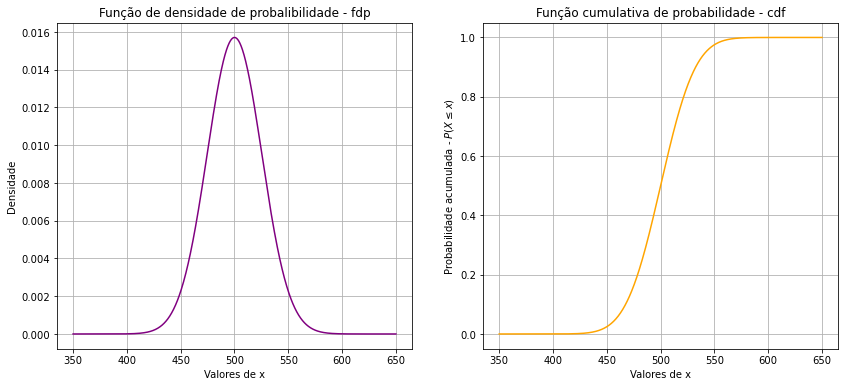

In [4]:
plt.figure(figsize= (14,6))

plt.subplot(121)
plt.plot(x, fx, 'purple')
plt.xlabel('Valores de x')
plt.ylabel('Densidade')
plt.title('Função de densidade de probalibilidade - fdp')
plt.grid(True)

plt.subplot(122)
plt.plot(x, cdf, 'orange')
plt.xlabel('Valores de x')
plt.ylabel('Probabilidade acumulada - $P( X \leq x )$')
plt.title('Função cumulativa de probabilidade - cdf')
plt.grid(True)



<div id="ex2"></div>

### EXERCÍCIO 2

Foi desenvolvido um sensor que acende uma luz no painel do automóvel para avisar o motorista que a concentração do poluente no tanque de combustível está crítica, ou seja, ultrapassa 550 $\mu g/L$. Responda:

1. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser superior a 580 $\mu g/L$?
2. Sabendo que a luz acendeu, qual é a probabilidade da concentração do poluente ser inferior a 560 $\mu g/L$?

*Resposta esperada: (1) 0.03333307956104959 (2) 0.6294099002523195*

In [5]:
# P(X > 550) = 1 - P( X<= 550)

# P( X > 580| X > 550) = P(X > 580)/P(X > 550)----------P(X > 580) = 1 - P(P <= 580)


In [6]:
# ITEM 1.
numerador = 1 - stats.norm.cdf(580, loc = mu, scale = sigma)
denominador = 1 - stats.norm.cdf(550, loc = mu, scale = sigma)

In [7]:
P = numerador/denominador
P

0.03333307956104959

In [8]:
# ITEM 2.
# P( X < 560| X > 550) = P( 550 < X < 560)/P(X > 550) ------ P(X < 560) = P(X <= 560)

In [9]:
numerador2 = stats.norm.cdf(560, loc = mu, scale = sigma) - stats.norm.cdf(550, loc = mu, scale = sigma) 
denominador2 = denominador

In [10]:
P2 = numerador2/denominador2
P2

0.6294099002523195

<div id="ex3"></div>

### EXERCÍCIO 3

A partir de qual concentração de poluente a luz do painel deveria acender para que apenas as 10% maiores concentrações fossem consideradas críticas? E para que apenas as 0,1% maiores concentrações fossem consideradas críticas?

*Resposta esperada: 532.547373131662 e 578.4821669580019*

In [11]:
# 90% das menores concentraçãoes é complementar aos 10% das maiores concentrações

In [12]:
# ITEM 1.

concentracao1 = stats.norm.ppf(1 - 0.1, loc = mu, scale = sigma)
concentracao1

532.547373131662

In [13]:
# ITEM 2.

concentracao2 = stats.norm.ppf(1 - 0.001, loc = mu, scale = sigma)
concentracao2

578.4821669580019

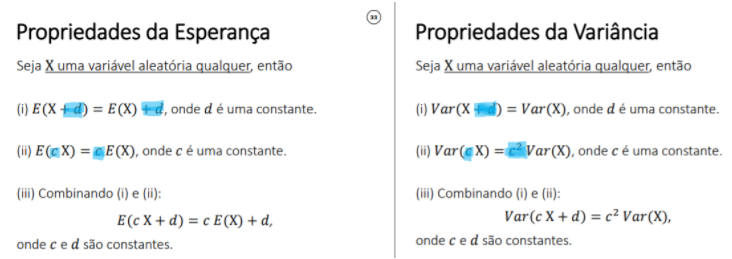

<div id="ex4"></div>

### EXERCÍCIO 4

Foi desenvolvida uma nova técnica que inicialmente aumenta a concentração do poluente em 100 $\mu g/L$ e depois reduz a nova concentração em 40%. Qual será a nova média e desvio padrão da concentração do poluente se aplicarmos essa nova técnica? Justifique sua resposta.

**Dica:** utilize as propriedades de esperança e variância.

*Resposta esperada: 360 e 15.238110119040353*

In [14]:
# ESCREVA SEU CÓDIGO AQUI

In [15]:
aux = mu + 100
novo_mu = aux*0.6
novo_mu

360.0

In [16]:
# var = sigma**2

# quando somado valores a variancia não muda, portanto a adição de 100 não influencia em nada
# quando multiplicado por k, a variancia nova será multiplicada por k²

nova_var = (0.6**2)*sigma**2
dp = sqrt(nova_var)

In [17]:
dp

15.238110119040353

<div id="resultados-empiricos"></div>

## Resultados empíricos

O arquivo `poluentes.csv` contém observações da concentração do poluente em tanques de combustível.

In [18]:
poluentes = pd.read_csv('poluentes.csv', header=None)
poluentes.columns = ['concentracao']
concentracao = poluentes['concentracao']
poluentes.head()

,concentracao
0,505.9817
1,493.6099
2,512.1535
3,484.6500
4,517.8975


<div id="ex5"></div>

### EXERCÍCIO 5

Considerando medidas-resumo, faça uma **análise descritiva** desses valores. Baseado nos dados, estime os valores dos parâmetros do modelo normal (média $\mu$ e desvio padrão $\sigma$).

*Resposta esperada: média=500.572255 desvio padrão=25.358164991137812*

In [19]:
# ESCREVA SEU CÓDIGO AQUI

concentracao.describe().to_frame()

,concentracao
count,400.000000
mean,500.572255
std,25.358165
min,415.746500
25%,483.369675
50%,500.735700
75%,518.428600
max,581.337400


In [20]:
mu_amostra = concentracao.mean()
mu_amostra

500.5722552500003

In [21]:
sigma_amostra = concentracao.std()
sigma_amostra

25.358164991137812

<div id="ex6"></div>

### EXERCÍCIO 6

Verifique quais seriam as respostas para o [Exercício 2](#ex2) utilizando os dados. Para isso, considere apenas as concentrações acima de 550 $\mu g/L$. Dentre essas concentrações, calcule a frequência relativa das que são:

1. Sabendo que a luz acendeu, calcular a frequência relativa de ser superior a 580 $\mu g/L$.
2. Sabendo que a luz acendeu, calcular a frequência relativa de ser inferior a 560 $\mu g/L$.

Discuta como esses valores se comparam às respostas do exercício 2. Por que são encontradas essas diferenças?

*Resposta esperada: (1) 0.14285714285714285 (2) 0.7142857142857143*

In [22]:
# P( X > 580| X > 550) = P(X > 580)/P(X > 550)----------P(X > 580) = 1 - P(P <= 580)

In [23]:
acima_580 = len(concentracao[concentracao > 580])/len(concentracao)
acima_550 = len(concentracao[concentracao > 550])/len(concentracao)

acima_580/acima_550

0.14285714285714285

In [24]:
# ITEM 2.
# P( X < 560| X > 550) = P( 550 < X < 560)/P(X > 550) ------ P(X < 560) = P(X <= 560)

In [25]:
entre_550_e_560 = ( len(concentracao[concentracao < 560]) - len(concentracao[concentracao < 550]) )/len(concentracao)

entre_550_e_560/acima_550

0.7142857142857143

<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

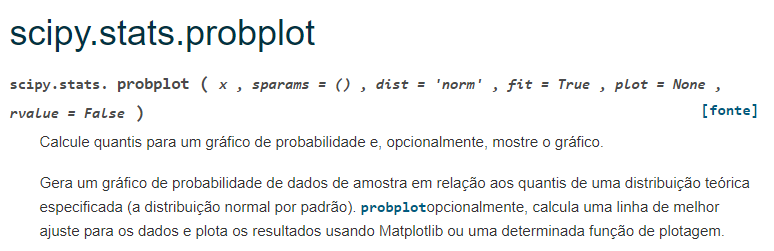

<div id="ex7"></div>
    
### EXERCÍCIO 7

> Uma maneira de sabermos se uma escolha de modelo teórico é adequado para descever o comportamento de uma variável mensurada em um problema real é utilizarmos a função `probplot()`. <p> 
Essa função `probplot()` traça uma reta indicando o que seria esperado do ponto de vista teórico utilizando a distribuição teórica *versus* os dados reais encontrados. Quanto mais próximos os pontos estiverem dessa reta, mais provável será que os dados sigam a distribuição escolhida nessa função.
    
Consulte a [documentação da função `probplot()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) e gere o `probplot()` com a distribuição normal. 

Discuta se é razoável assumirmos que os dados vieram de uma distribuição normal. **Dica**: para visualizar o gráfico utilize o argumento `plot=plt` na chamada da função `probplot()`.

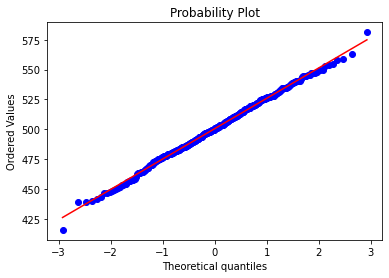

In [26]:
# ESCREVA SEU CÓDIGO AQUI

stats.probplot(concentracao, dist = 'norm', plot = plt); # QQ plot 

# Quantil AMOSTRA(Y) x Quantil TEÓRICO(X)

In [34]:
concentracao.quantile(0.5) 

# Quantil com ordem percentual de 50% => Mediana
# quantile -> qual o ponto que separa os 50 maiores valores dos 50 menores valores

500.7357

In [ ]:
# mediana - é o valor que separa a metade maior e a metade menor de uma amostra.

In [35]:
stats.norm.ppf(0.5, loc = mu_amostra, scale = sigma_amostra)
# Mediana a partir do modelo teórico

500.5722552500003

In [36]:
print(concentracao.quantile(0.1)) # Quantil da amostra
print(stats.norm.ppf(0.1, loc = mu_amostra, scale = sigma_amostra))
# Quantil teórico

467.75768
468.07445920626935


In [37]:
percentual = np.linspace(0,1,101)
percentual

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [48]:
quantil_amostra = concentracao.quantile(percentual)
quantil_teorico = stats.norm.ppf(percentual, loc = mu_amostra, scale = sigma_amostra)

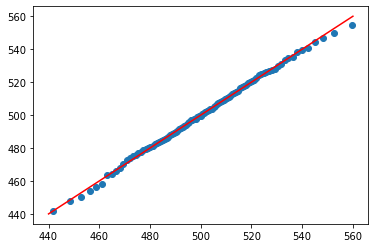

In [55]:
plt.scatter(quantil_teorico,quantil_amostra);
plt.plot([440,560],[440,560], 'red') # Bissetriz
plt.show()

In [50]:
quantil_amostra.to_frame().head()

,concentracao
0.00,415.746500
0.01,441.692165
0.02,447.697396
0.03,450.540198
0.04,453.905500


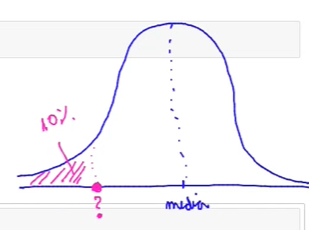

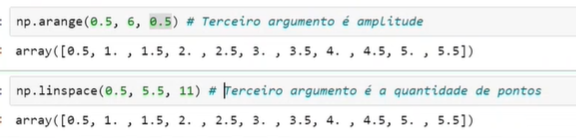

<div id="ex8"></div>
    
### EXERCÍCIO 8

Construa um histograma para visualizar os dados de concentração de poluentes divididos em 21 faixas. **Dica**: consulte a documentação da função aqui: [https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html). Além disso, há um exemplo de histograma na atividade da aula 15 (distribuição exponencial).

Plote também a função de densidade de probabilidade (f.d.p.) da distribuição normal utilizando os novos parâmetros calculados a partir dos dados.

In [30]:
menor = min(concentracao)
maior = max(concentracao)

In [31]:
x = np.linspace(menor-10,maior+10,10000)
novo_fx = stats.norm.pdf(x,loc = mu_amostra, scale = sigma_amostra )

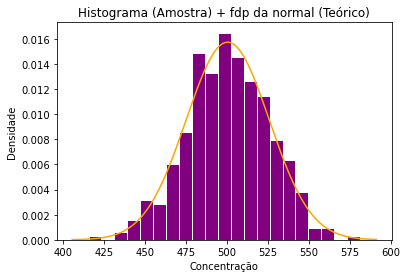

In [33]:
# ESCREVA SEU CÓDIGO AQUI
# faixas = np.linspace(menor-10,maior+10,21)
plt.hist(concentracao, bins = 21, density = True, edgecolor = 'white', color = 'purple');

plt.plot(x,novo_fx, 'orange')
plt.title('Histograma (Amostra) + fdp da normal (Teórico)')
plt.xlabel('Concentração')
plt.ylabel('Densidade')
plt.show()

<div id="ex9"></div>

### EXERCÍCIO 9

Vamos simular a aplicação da técnica introduzida no [Exercício 4](#ex4). Crie uma nova coluna em `poluentes` chamada `'nova concentracao'`. Essa coluna deve ser o resultado da aplicação da técnica do exercício 4 em cada valor da coluna `'concentracao'`, ou seja, para cada valor de concentração, adicionar 100 e aplicar a redução de 40%.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

poluentes['Nova concentração'] = (poluentes.concentracao + 100)*0.6
poluentes['Nova concentração'].to_frame().head()

In [ ]:
poluentes['concentracao'].to_frame().head()

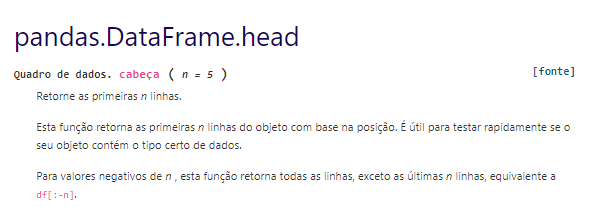

<div id="ex10"></div>

### EXERCÍCIO 10

Calcule a média e o desvio padrão dessa nova coluna `'nova concentracao'`. Discuta como ela se compara com relação aos valores teóricos obtidos no [exercício 4](#ex4).

*Resposta esperada: Média: 360.3433531500001 DP: 15.21489899468268*

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

In [ ]:
poluentes['Nova concentração'].describe().to_frame()

In [ ]:
mu_nova_conc = poluentes['Nova concentração'].mean()
mu_nova_conc

In [ ]:
dp_nova_conc = poluentes['Nova concentração'].std()
dp_nova_conc

___

<div id="z"></div>

# Normal Padrão: Leitura Complementar

Seja $X$ uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, 

$\qquad\qquad X\sim N(\mu, \sigma^2)$.

Então a variável aleatória definida por

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma}$

terá média zero e variância 1. 

Ainda, prova-se que

$\qquad\qquad Z=\frac{(X−\mu)}{\sigma} \sim N(0;1)$,

pois toda combinação linear de uma v.a. com distribuição normal também é uma normal.

<div id="ex11"></div>

### EXERCÍCIO 11

Se $X\sim N(500, 645)$, então **UTILIZANDO A DISTRIBUIÇÃO NORMAL PADRÃO**, calcule:
* P(X < 480)
* P(X > 509)
* Valor de x tal que P(X < x) seja igual a 5%.

In [ ]:
# P(X < 480) 

P1 = stats.norm.cdf(480, loc = mu, scale = sigma)
P1

In [ ]:
P2 = 1 - stats.norm.cdf(509, loc = mu, scale = sigma)
P2

In [ ]:
concentracao = stats.norm.ppf(0.05, loc = mu, scale = sigma)
concentracao

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`.pdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.cdf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.ppf`](#ppf): ESCREVA AQUI O RESUMO
- [`.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.var`](#pmf-stats): ESCREVA AQUI O RESUMO
